In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.
/home/shuvendu/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [4]:
from os import listdir
path = "E:\Datasets\KDEF_and_AKDEF\\KDEF"
pathlist = listdir(path)

In [19]:
from shutil import copyfile
import os

for i in range(len(pathlist)):
    img_path = listdir(path+"\\"+pathlist[i])
    for j in range(len(img_path)):
        if(img_path[j][4:6]=="AF"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\AF"
        elif(img_path[j][4:6]=="AN"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\AN"
        elif(img_path[j][4:6]=="DI"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\DI"
        elif(img_path[j][4:6]=="HA"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\HA"
        elif(img_path[j][4:6]=="NE"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\NE"
        elif(img_path[j][4:6]=="SA"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\SA"
        elif(img_path[j][4:6]=="SU"):
            dst = "E:\\Datasets\\KDEF_and_AKDEF\\data\\SU"
        
        if not os.path.exists(dst):
            os.makedirs(dst)
        
        src = path+"\\"+pathlist[i]+"\\"+img_path[j]
        dst = dst + "\\" + img_path[j]
        try:
            copyfile(src, dst)
        except:
            pass

# Training with CNN

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

from keras import models
from keras import layers

from keras import losses, optimizers, metrics


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/train'
test_dir ='/media/shuvendu/Projects/Datasets/KDEF_and_AKDEF/data/test'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size=32
)

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150, 150),
    batch_size=32
)

Found 3918 images belonging to 7 classes.
Found 980 images belonging to 7 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 73984)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               9470080   
__________

In [ ]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 155,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=10
)

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Try using pretrined model

In [9]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(150, 150, 3))

In [10]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_6 (Dense)              (None, 7)                 3591      
Total params: 18,913,095
Trainable params: 18,913,095
Non-trainable params: 0
_________________________________________________________________


In [11]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.Adam(lr=5e-5), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=155, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=10)

This is the number of trainable weights before freezing the conv base: 4
Epoch 1/15
155/155 [==============================] - 60s - loss: 1.7638 - categorical_accuracy: 0.2753 - val_loss: 1.1743 - val_categorical_accuracy: 0.5250
Epoch 2/15
155/155 [==============================] - 61s - loss: 0.9207 - categorical_accuracy: 0.6380 - val_loss: 0.7162 - val_categorical_accuracy: 0.7438
Epoch 3/15
155/155 [==============================] - 61s - loss: 0.5071 - categorical_accuracy: 0.8182 - val_loss: 0.6715 - val_categorical_accuracy: 0.7370
Epoch 4/15
155/155 [==============================] - 60s - loss: 0.3218 - categorical_accuracy: 0.8868 - val_loss: 0.3267 - val_categorical_accuracy: 0.8969
Epoch 5/15
155/155 [==============================] - 62s - loss: 0.2314 - categorical_accuracy: 0.9180 - val_loss: 0.4429 - val_categorical_accuracy: 0.8669
Epoch 6/15
155/155 [==============================] - 61s - loss: 0.1457 - categorical_accuracy: 0.9531 - val_loss: 0.4270 - val_categori

### Load model saved in this location

In [18]:
from keras.models import load_model
model = load_model('fc_pretrain.h5')
conv_base = model.layers[0]

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1048704   
_________________________________________________________________
dense_14 (Dense)             (None, 7)                 903       
Total params: 15,764,295
Trainable params: 15,764,295
Non-trainable params: 0
_________________________________________________________________


In [12]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [ ]:
model.compile(
    optimizer=optimizers.RMSprop(lr=1e-4), 
    loss=losses.categorical_crossentropy, 
    metrics=[metrics.categorical_accuracy]
)

history = model.fit_generator(train_generator, 
                              steps_per_epoch=125, 
                              epochs=15, 
                              validation_data=validation_generator, 
                              validation_steps=30)

Epoch 1/15
125/125 [==============================] - 27s - loss: 0.0604 - categorical_accuracy: 0.9810 - val_loss: 0.6150 - val_categorical_accuracy: 0.8776
Epoch 2/15
125/125 [==============================] - 26s - loss: 0.0319 - categorical_accuracy: 0.9907 - val_loss: 0.4567 - val_categorical_accuracy: 0.9030
Epoch 3/15
125/125 [==============================] - 25s - loss: 0.0226 - categorical_accuracy: 0.9922 - val_loss: 0.7657 - val_categorical_accuracy: 0.8703
Epoch 4/15
125/125 [==============================] - 25s - loss: 0.0290 - categorical_accuracy: 0.9922 - val_loss: 0.4947 - val_categorical_accuracy: 0.8882
Epoch 5/15
125/125 [==============================] - 25s - loss: 0.0145 - categorical_accuracy: 0.9952 - val_loss: 0.6358 - val_categorical_accuracy: 0.9124
Epoch 6/15
125/125 [==============================] - 26s - loss: 0.0170 - categorical_accuracy: 0.9957 - val_loss: 0.6232 - val_categorical_accuracy: 0.9167
Epoch 7/15
125/125 [==============================] 

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.save('fully_trained_model.h5')

In [1]:
from keras.models import load_model
model = load_model('fully_trained_model.h5')

Using TensorFlow backend.


# Test the model

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [59]:
labels = {
    0 : "Afraid",
    1 : "Angry",
    2 : "disgust",
    3 : "happy",
    4 : "neutral",
    5 : "sad",
    6 : "surprised"
}

In [54]:
image = cv2.imread('E:\\2.jpg')
image.shape

(370, 240, 3)

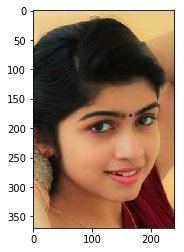

In [55]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [57]:
image=np.array(cv2.resize(image, (150,150)))
image = image.reshape(1, 150, 150, 3)
image.shape

(1, 150, 150, 3)

In [61]:
labels[np.argmax(model.predict(image))]

'happy'